In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import folium

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None) # display all columns, without limits

In [3]:
# Load the dataset
order_payments_df = pd.read_csv('dataset/olist_order_payments_dataset.csv')
order_payments_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


### **Missing Values**

In [4]:
order_payments_df.isna().sum() # check for missing values

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

### **Duplicate Values**

In [5]:
order_payments_df.duplicated().sum() # check for duplicates

0

### **Unique Values**

In [6]:
pd.set_option('display.max_colwidth', None)

listItem = []
for col in order_payments_df.columns :
    listItem.append([col, order_payments_df[col].nunique(), order_payments_df[col].sort_values().unique()])

df_uniques_per_column = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'], data=listItem)
df_uniques_per_column.sort_values('Number of Unique', ascending=False)

,Column Name,Number of Unique,Unique Sample
0,order_id,99440,"[00010242fe8c5a6d1ba2dd792cb16214, 00018f77f2f0320c557190d7a144bdd3, 000229ec398224ef6ca0657da4fc703e, 00024acbcdf0a6daa1e931b038114c75, 00042b26cf59d7ce69dfabb4e55b4fd9, 00048cc3ae777c65dbb7d2a0634bc1ea, 00054e8431b9d7675808bcb819fb4a32, 000576fe39319847cbb9d288c5617fa6, 0005a1a1728c9d785b8e2b08b904576c, 0005f50442cb953dcd1d21e1fb923495, 00061f2a7bc09da83e415a52dc8a4af1, 00063b381e2406b52ad429470734ebd5, 0006ec9db01a64e59a68b2c340bf65a7, 0008288aa423d2a3f00fcb17cd7d8719, 0009792311464db532ff765bf7b182ae, 0009c9a17f916a706d71784483a5d643, 000aed2e25dbad2f9ddb70584c5a2ded, 000c3e6612759851cc3cbb4b83257986, 000e562887b1f2006d75e0be9558292e, 000e63d38ae8c00bbcb5a30573b99628, 000e906b789b55f64edcb1f84030f90d, 000f25f4d72195062c040b12dce9a18a, 001021efaa8636c29475e7734483457d, 0010b2e5201cc5f1ae7e9c6cc8f5bd00, 0010dedd556712d7bb69a19cb7bbd37a, 00119ff934e539cf26f92b9ef0cdfed8, 0011d82c4b53e22e84023405fb467e57, 00125cb692d04887809806618a2a145f, 00130c0eee84a3d909e75bc08c5c3ca1, 0013503b13da1eac686219390b7d641b, 00137e170939bba5a3134e2386413108, 001427c0ec99cf8af737bd88e92fd444, 00143d0f86d6fbd9f9b38ab440ac16f5, 0014ae671de39511f7575066200733b7, 0015ebb40fb17286bea51d4607c4733c, 00169e31ef4b29deaae414f9a5e95929, 0016dfedd97fc2950e388d2971d718c7, 0017afd5076e074a48f1f1a4c7bac9c5, 001862358bf858722e1e2ae000cfed8b, 0019c29108428acffd089c36103c9440, 001ab0a7578dd66cd4b0a71f5b6e1e41, 001ac194d4a326a6fa99b581e9a3d963, 001b76dd48a5b1eee3e87778daa40df8, 001c85b5f68d2be0cb0797afc9e8ce9a, 001d8f0e34a38c37f7dba2a37d4eba8b, 001daeb0eddc45b999bad0801ad9d273, 001dbc16dc51075e987543d23a0507c7, 001e7ba991be1b19605ca0316e7130f9, 001e7cf2ad6bef3ade12ebc56ceaf0f3, 0020262c8a370bd5a174ea6a2a267321, 0020a222f55eb79a372d0efee3cca688, 002175704e8b209f61b9ad5cfd92b60e, 00229e4e43f7a7e0b9dd819ad43268d3, 0025081dcf9330f9a5052ae82c6ce396, 00254baeb6c932b0a8aeead91fbd02b5, 00259a44fcad3fc0474329e925d14fc3, 0025c5d1a8ca53a240ec2634bb4492ea, 002611a77fe03d076285fd4ca95db77c, 002691433f09002ac9ca0c4e8dbb8ead, 0026a368634b6e6f34f33b1499773a30, 00275bce676303c3bfd7292aefdfa223, 00276d5c3491fbf55305e26891040df9, 002834535f7a609a5c68266f173fa59e, 0028de0ca693a1bb26448916a81105cc, 002955b0acc63d04f6724a31967e82bd, 0029c5db35ef291ce99d1262012e7daa, 0029f17cf0e7640c5cb6825af681303f, 002af7fa9eb99d1456bceb6a13d6fc0b, 002b430ff89b3a24c31a1170acbbedea, 002b4e6fa42cd4a22cc86abc18fe9c05, 002c9def9c9b951b1bec6d50753c9891, 002d040018d12a3853c059f7f23ab5b1, 002f16b7bc4530031b7d90f791b12d8a, 002f19a65a2ddd70a090297872e6d64e, 002f98c0f7efd42638ed6100ca699b42, 0030d783f979fbc5981e75613b057344, 0030ff924c38549807645976adeef2c0, 00310b0c75bb13015ec4d82d341865a4, 00324b3eda39ba5ecce3945823e3594c, 0032d07457ae9c806c79368d7d9ce96b, 003324c70b19a16798817b2b3640e721, 00335b686d693c7d72deeb12f8e89227, 00335f75ea6a4455b524a8dd177067f5, 00337fe25a3780b3424d9ad7c5a4b35e, 003423b755b562962a6225a8de40d12e, 00345f338696283410b7977d2e3efc89, 0035246a40f520710769010f752e7507, 0035c0b07126fe9c24a325216fb96064, 0035e6b7ade84b3f5b86bd49814793df, 0036757472ece3dde52fd4bfd929c90e, 0036887767dea4bd43b1a88cd0d9477a, 00378c6c981f234634c0b9d6128df6dd, 003822434f91204da0a51fe4cf2aba18, 0039500db36d50d7d0bfaf23723550f3, 003a7f59d7e08a9c61d9e2881fe6459c, 003a94f778ef8cfd50247c8c1b582257, 003cc6161d7a2593f2525cce0c330d32, 003d0634280ff3d1d3a54459349a6899, 003d804eef0e1b856881cd18e0cc0d4c, 003d9fc84ad902adf2265248b5ffe1a4, ...]"
4,payment_value,29077,"[0.0, 0.01, 0.03, 0.05, 0.07, 0.08, 0.09, 0.1, 0.11, 0.13, 0.14, 0.15, 0.16, 0.17, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.31, 0.32, 0.33, 0.34, 0.36, 0.37, 0.38, 0.39, 0.41, 0.42, 0.43, 0.44, 0.47, 0.48, 0.49, 0.52, 0.53, 0.54, 0.55, 0.56, 0.58, 0.59, 0.6, 0.61, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.72, 0.73, 0.74, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.91, 0.92, 0.93, 0.94, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07

### **Payment Value**

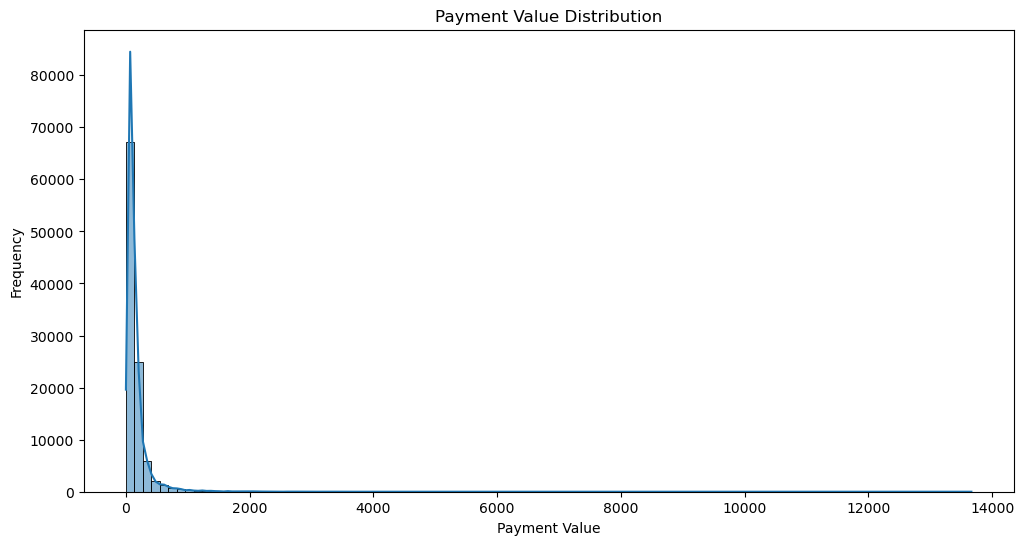

In [7]:
# histplot of the payment_value column
plt.figure(figsize=(12, 6))
sns.histplot(order_payments_df['payment_value'], bins=100, kde=True)
plt.title('Payment Value Distribution')
plt.xlabel('Payment Value')
plt.ylabel('Frequency')
plt.show()

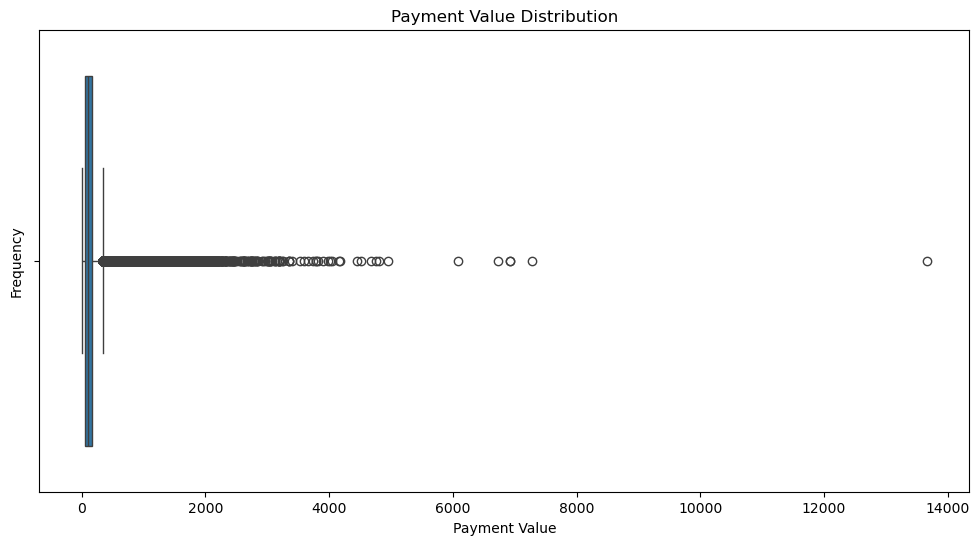

In [17]:
# histplot of the payment_value column
plt.figure(figsize=(12, 6))
sns.boxplot(data=order_payments_df, x='payment_value')
plt.title('Payment Value Distribution')
plt.xlabel('Payment Value')
plt.ylabel('Frequency')
plt.show()

### **Payment Sequential**

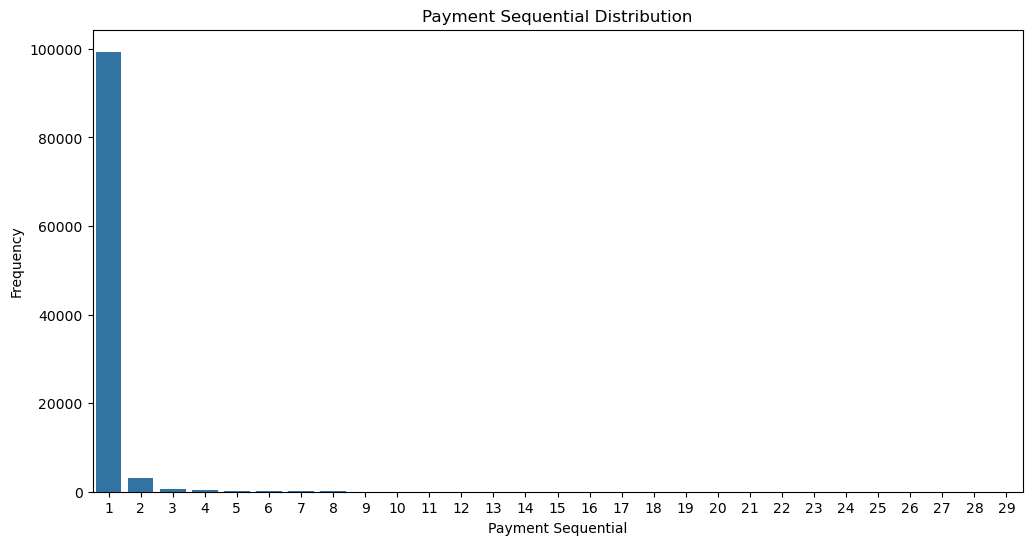

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(data=order_payments_df, x='payment_sequential')
plt.title('Payment Sequential Distribution')
plt.xlabel('Payment Sequential')
plt.ylabel('Frequency')
plt.show()

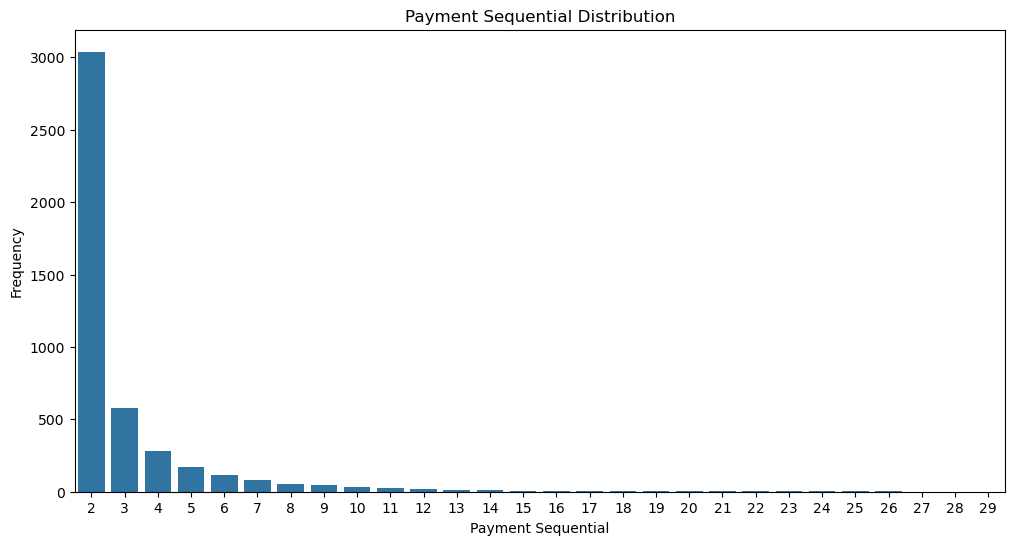

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(data=order_payments_df[order_payments_df['payment_sequential']>1], x='payment_sequential')
plt.title('Payment Sequential Distribution')
plt.xlabel('Payment Sequential')
plt.ylabel('Frequency')
plt.show()

### **Payment Installments**

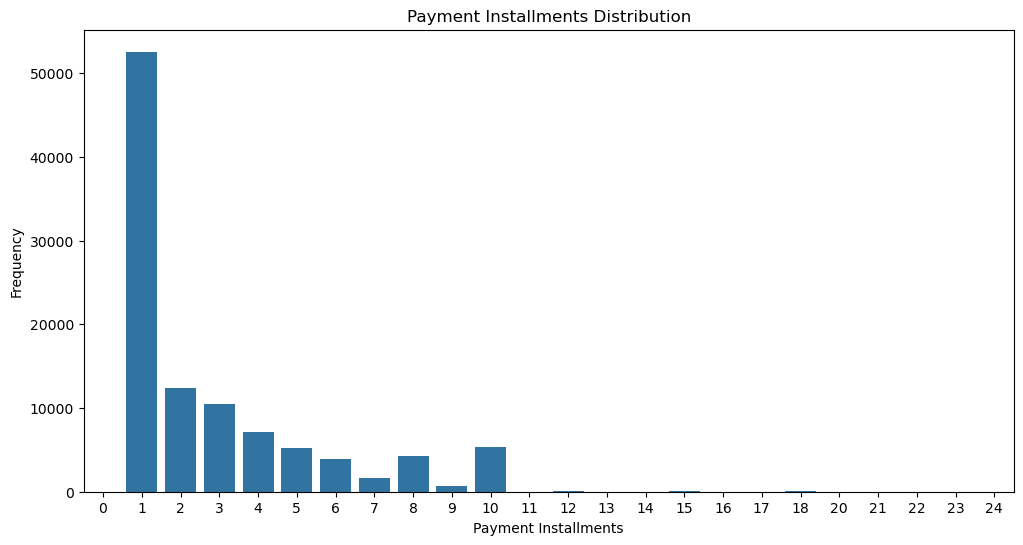

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(data=order_payments_df, x='payment_installments')
plt.title('Payment Installments Distribution')
plt.xlabel('Payment Installments')
plt.ylabel('Frequency')
plt.show()

In [14]:
order_payments_df.groupby('payment_installments')['order_id'].count()

payment_installments
0         2
1     52546
2     12413
3     10461
4      7098
5      5239
6      3920
7      1626
8      4268
9       644
10     5328
11       23
12      133
13       16
14       15
15       74
16        5
17        8
18       27
20       17
21        3
22        1
23        1
24       18
Name: order_id, dtype: int64

### **Payment Type**

In [ ]:
order_payments_df.groupby('payment_type')['payment_value'].count().sort_values(ascending=False).reset_index()

,payment_type,payment_value
0,credit_card,76795
1,boleto,19784
2,voucher,5775
3,debit_card,1529
4,not_defined,3


### **Payment Value vs Installments**

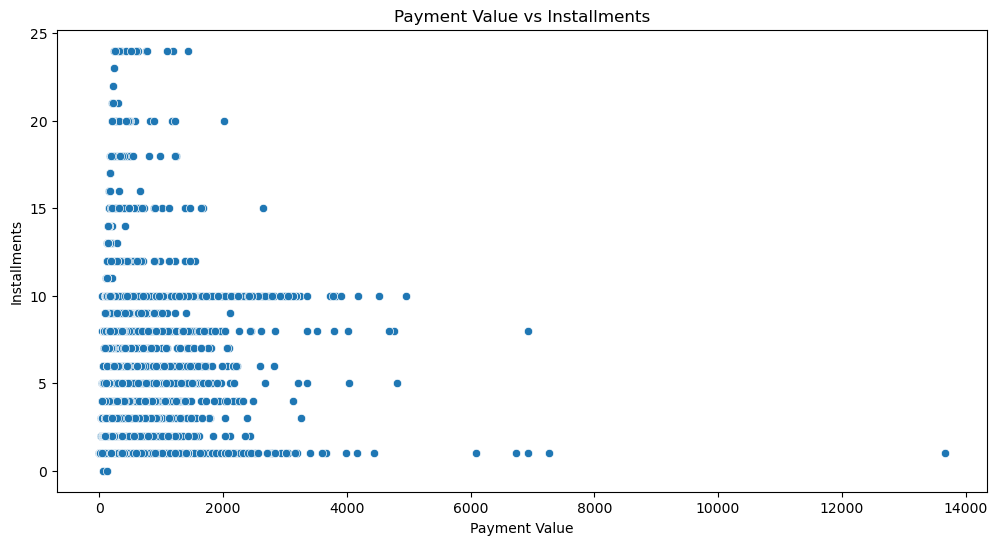

In [15]:
# scatterplot of price vs freight_value
plt.figure(figsize=(12, 6))
sns.scatterplot(data=order_payments_df, x='payment_value', y='payment_installments')
plt.title('Payment Value vs Installments')
plt.xlabel('Payment Value')
plt.ylabel('Installments')
plt.show()